<a href="https://colab.research.google.com/github/Ben-069/GIS-Public-Sector/blob/main/PS03_Benito.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **AGRICULTURAL LAND, SOCIAL, ECONOMIC, AND DEMOGRAPHIC OVERVIEW OF PARAGUAY**

Introduction

Paraguay is located in the heart of South America between the coordinates: 23.4425° South, 58.4438° West. It is also bordered by countries like Brazil and Bolivia on its northern side, Argentina and Brazil on the east side, and Brazil and Bolivia on the west. Paraguay has a total area of 406,752 square meters. According to the National Institute of Statistics (INE, 2022), Paraguay has a population of 6.109.644 after the last national census in 2022.

Paraguay is divided into two main regions, The "Region Oriental" in the north and the "Region Oriental" in the south and administrative divided into 17 departments (equivalent to provinces or states). Every departament are also divided into municipalities called "Distritos".

Agriculture, Cattle Raising, forestry and fishing, contributes the 30 percent to the Gross Domestic Product.From Which 40% are from exports of products like soybean, corn, etc.

Objective:

The main objective of this project is to make a contrast between the Productive Areas in Paraguay and its principal socio, economic and demographical facts such as poverty, education level, population density.

Methodology:

This project has a descriptive approach. And collect and compare data from official government sources like the National Institute of Statistics (INE), The last 2022 National Census, The Las Agronomic Census, the Paraguayan Ministry of Agriculture (MAG), the National Meteorologic and Hydrologic Department (DMH) and other external sources such as the World Bank, The Food And Agriculture Organization etc.

Geopandas and Python were used to generate the maps and graphics.

Limitations:

The lack of actual accessible data on those topics mentioned above
The extreme bureaucracy and inefficiency of the Paraguayan government to provide data

In [1]:
%%capture
!pip install geopandas==1.0.1
!pip install mapclassify

In [2]:
import os, zipfile #basics
import pandas as pd #data management
import matplotlib.pyplot as plt #vis

import geopandas as gpd #gis/maps: a sister of pandas; does the job;
#tho not as fancy-interactive as folium or leafmap https://geopandas.org/

import mapclassify #need for thematic map classification

#will display all output not just last command
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from google.colab import files #to download from colab onto hd

from google.colab import data_table
data_table.enable_dataframe_formatter() #this enables spreadsheet view upon calling dataframe (without() )

In [3]:
#!python --version
gpd.__version__

'1.0.1'

In [4]:
#i found one and reposted on my website, download it onto colab:
! wget -q -O agripy.zip https://docs.google.com/uc?id=1VD1HfR2OAl2HcYY3PPVzShk1HfkZzEMc&export=download
zip_ref = zipfile.ZipFile('agripy.zip', 'r'); zip_ref.extractall(); zip_ref.close() #just unzipping
agripyC0=gpd.read_file('/content/AgroMaps/LatinAmericaCaribbean/shapefiles/PRY/admin1/pry.shp') #load the shapefile with gpd as njC

<Axes: >

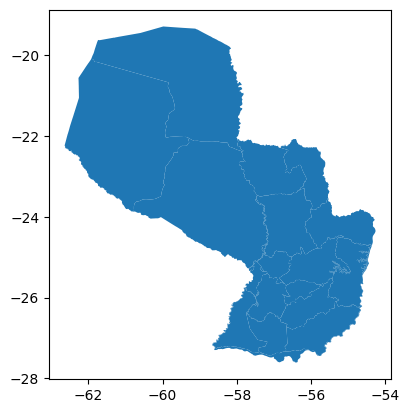

In [5]:
agripyC0.plot()

In [6]:
agripyC0.columns

Index(['UNCODEOR', 'CNTNAME3', 'COUNTRY_NA', 'CNTCODE_', 'NAME1_', 'PCODE',
       'COMMENTS_', 'geometry'],
      dtype='object')

In [7]:
agripyC0 = agripyC0.rename(columns={"NAME1_": "Departamentos"})

In [8]:
agripyC0['Departamentos']

,Departamentos
0,Alto Paraguay
1,Alto Parana
2,Amambay
3,Asuncion
4,Boqueron
5,Caaguazu
6,Caazapa
7,Canindeyu
8,Central
9,Concepcion


# ANNUAL TEMPERATURE RATE
During 2022, Paraguayan territory experienced heat waves in January, March, and December, **with the highest maximum temperature of** **44.2°C** **(111.56 F)** recorded in Mariscal Estigarribia, Boquerón, on December 9. July was notably warm across the country, with average maximum temperatures ranging from 4°C to 6°C above the monthly average. The highest temperatures were concentrated in the extreme north of the Western Region, setting new historical records for maximum temperature during this month. New daily records for maximum temperatures were recorded throughout the year, including six new historical highs.

During winter, **minimum temperatures dropped below 0.0°C**, **(32F) **with the lowest value of the year at -2.4°C **(28 F Aprox)** recorded in General Bruguéz, Presidente Hayes, on August 19. Notably, in August and December, cold air masses moved over the country, breaking daily minimum temperature records in most towns. Frost and freezing events were observed in several areas in May, June, and August.



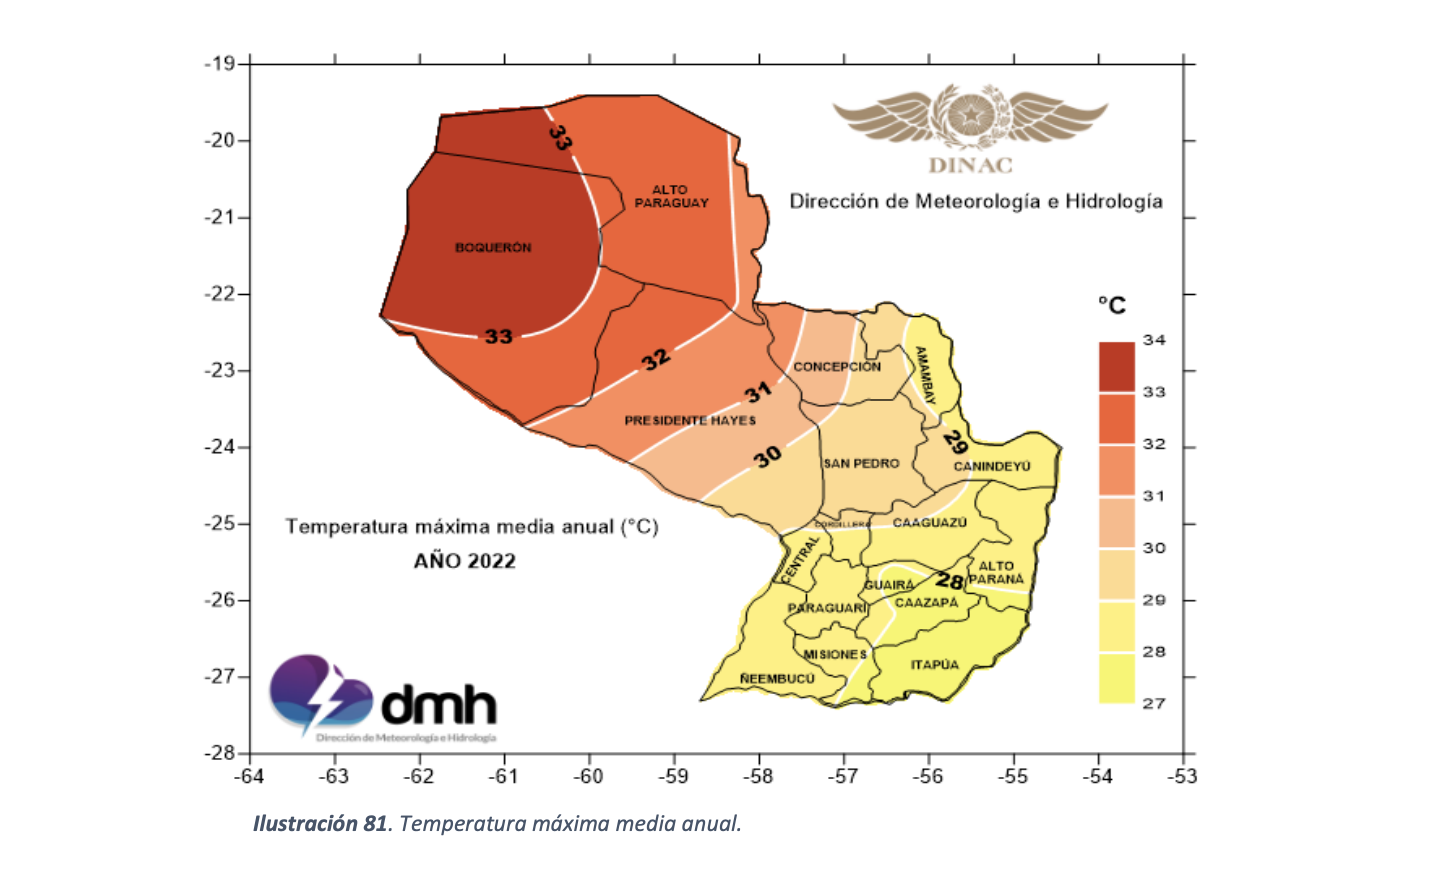


https://www.meteorologia.gov.py/wp-content/uploads/2023/05/Anuario_climatologico_2022.pdf

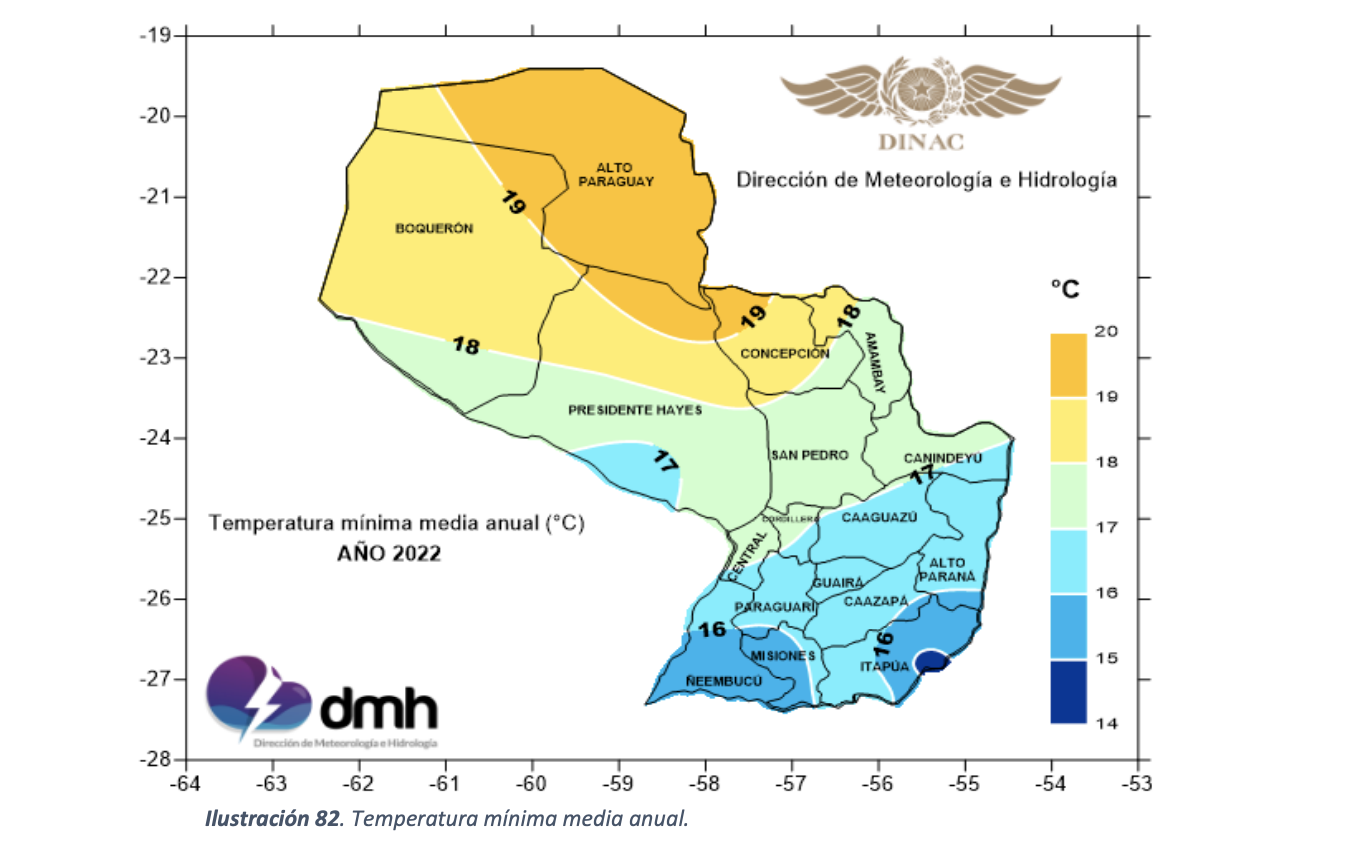

https://www.meteorologia.gov.py/wp-content/uploads/2023/05/Anuario_climatologico_2022.pdf

# ANNUAL PRECIPITATION RATE
**The highest monthly accumulated precipitation was 425.2 mm, while the maximum 24-hour precipitation rate was 155.4 mm, recorded on March 23 in the town of Capitán Meza, department of Itapúa.** Accumulated precipitation throughout the year was generally deficient across most of the national territory, except for some areas in the center, southeast, east, and northeast of the Eastern Region. Moderate to strong winds were observed, particularly in March and October, with maximum speeds exceeding **100 km/h**, mainly during rain events with thunderstorms in various localities. The highest wind speed recorded by the automatic station network was 119 km/h on March 30 in Encarnación, department of Itapúa. (DMH, 2022)

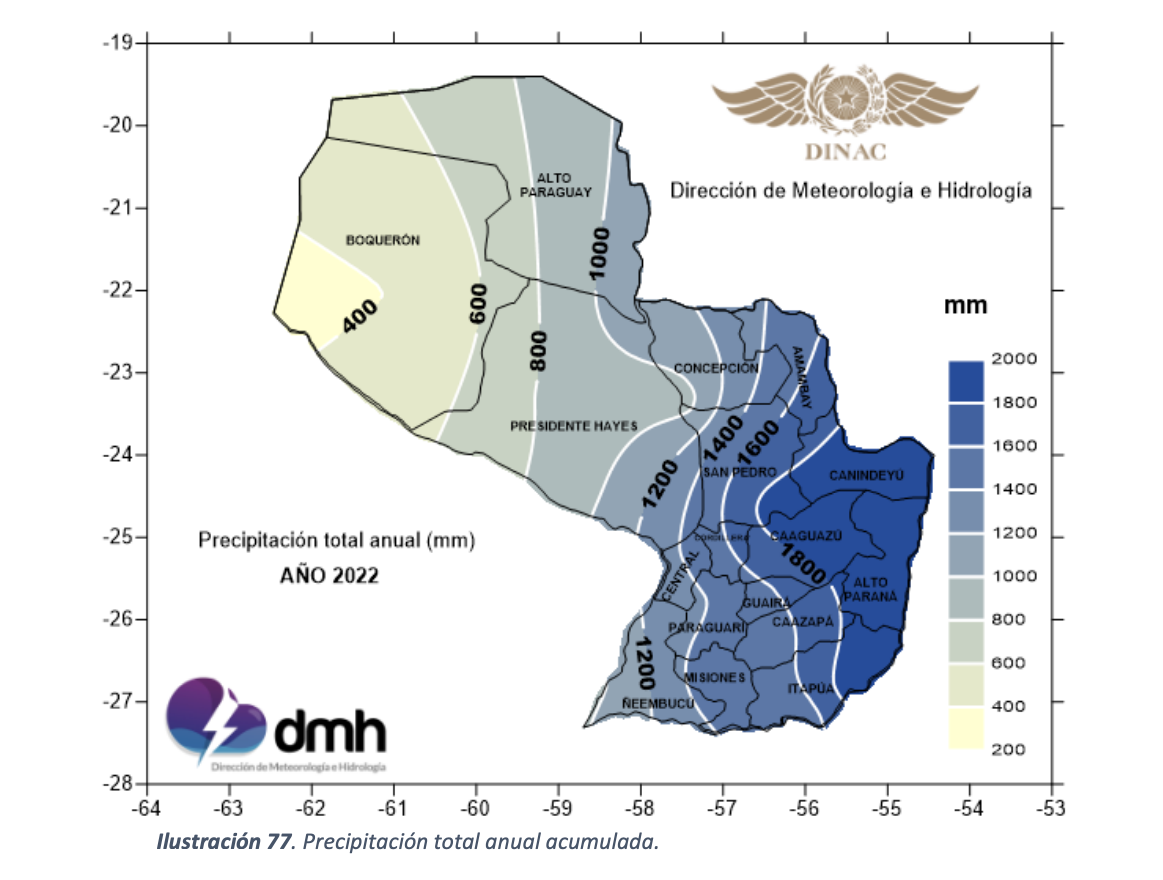

https://www.meteorologia.gov.py/wp-content/uploads/2023/05/Anuario_climatologico_2022.pdf

# **PARAGUAY POPULATION DENSITY**

According to data from the 2022 National Census, Paraguay has a population of 6,109,644, comprising 3,078,000 men and 3,030,650 women, distributed across 2,109,864 households. The majority of the population, 4,215,101 people (69.0%), reside in urban areas, while 1,894,802 people (31.0%) live in rural areas. The final census results also reveal that Central is the most populated department in the country, with 1,883,927 inhabitants.

https://www.ine.gov.py/Publicaciones/Biblioteca/documento/233/censo2022.pdf

In [9]:
pop2022=pd.read_excel('https://docs.google.com/uc?id=1IG11BS_p2ON6v8oHKe_YiIuKeBGvYsQk&export=download')

In [10]:
pop2022.head(25)

,Departamentos,Total de Viviendas,Poblacion
0,Asuncion,153029,477346
1,Concepcion,65920,204536
2,San Pedro,134826,341895
3,Cordillera,106425,271475
4,Guaira,69629,180121
5,Caaguazu,153305,430142
6,Caazapa,54326,140060
7,Itapua,176247,436966
8,Misiones,44437,114542
9,Paraguari,79083,199430


In [11]:
pop2022.dtypes

,0
Departamentos,object
Total de Viviendas,int64
Poblacion,int64


In [12]:
pop1 = pd.merge(agripyC0, pop2022, on='Departamentos',how='outer',indicator=True) #(make sure to have njC shapefile from previous sec)
pop1[['Departamentos','Poblacion','_merge']] #all good, NEW JERSEY expected not to merge

,Departamentos,Poblacion,_merge
0,Alto Paraguay,17608.0,both
1,Alto Parana,784839.0,both
2,Amambay,173770.0,both
3,Asuncion,477346.0,both
4,Boqueron,NaN,left_only
5,Boqueron,68595.0,right_only
6,Caaguazu,430142.0,both
7,Caazapa,140060.0,both
8,Canindeyu,189128.0,both
9,Central,1866562.0,both


In [13]:
agripyC0['Departamentos'] = agripyC0['Departamentos'].str.strip()
pop2022['Departamentos'] = pop2022['Departamentos'].str.strip()

In [14]:
agripyC0 = agripyC0.dropna(subset=['Departamentos'])
pop2022 = pop2022.dropna(subset=['Departamentos'])

In [15]:
pop2 = pd.merge(agripyC0, pop2022, on='Departamentos',how='inner',indicator=False) #so do 'inner' that will only keep the exact matches

In [16]:
type(pop2)

geopandas.geodataframe.GeoDataFrame

<Axes: >

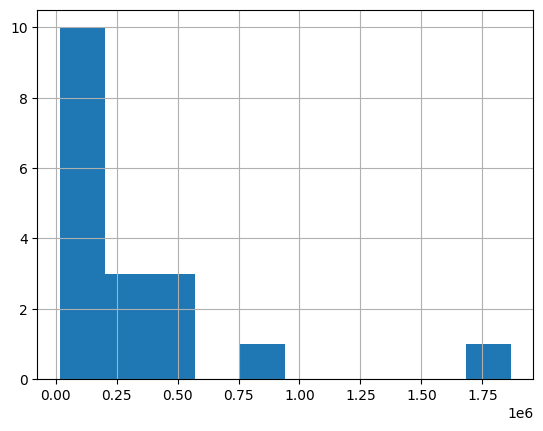

In [17]:
#do think how distribution translate into colors!!
pop2.Poblacion.hist() #super skewed!

<Axes: >

Text(0.5, 1.0, "Paraguay's 2022 Population")

[]

[]

Text(0.5, 219.56354829913386, 'INE, 2022')

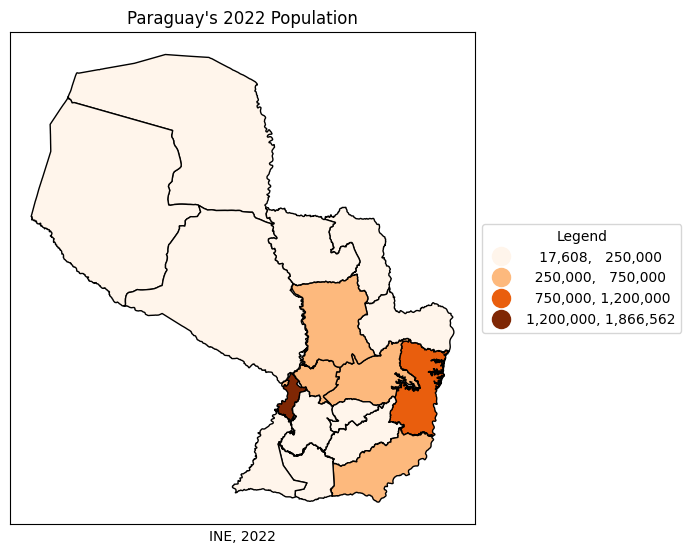

In [18]:
fig, ax = plt.subplots(1, figsize=(6,10))
pop2.plot(ax=ax, column='Poblacion', legend=True, cmap='Oranges',
              scheme='user_defined', classification_kwds= {'bins':[250000, 750000, 1200000]},k=4, edgecolor='black', linewidth=1,
              legend_kwds={"fmt": "{:,.0f}", 'loc': 'center left', 'bbox_to_anchor': (1, 0.5), 'markerscale': 1.4},
              missing_kwds={'color': 'grey', 'edgecolor': 'black'})

leg1 = ax.get_legend()
leg1.set_title('''Legend''')  # Cambié el texto a "Legend"
ax.set_title("Paraguay's 2022 Population")
ax.set_xticks([])  # Elimina las etiquetas en el eje x
ax.set_yticks([])  # Elimina las etiquetas en el eje y
ax.set_xlabel('''INE, 2022''')

# plt.savefig('fig.pdf', bbox_inches='tight')

# **POVERTY RATE**

The monthly cost per person of a food basket or extreme poverty line in urban areas is 312,187 guaraníes and for total poverty it is 771,558 guaraníes (USD100) . On the other hand, in rural areas for the year 2021 the extreme poverty line has a value of 285,099 guaraníes (USD 37.14) and the total poverty line of 554,377 guaraníes (USD 72.21) per month per person (Table No. 1). The extreme poverty line in urban areas is higher than in rural areas by approximately 9%, as well as the total poverty line is higher in favor of urban areas by 28%. The value of the basic food basket (extreme poverty line) for the year 2021 increased by 14.7% compared to 2020, while the basic consumption basket (total poverty line) increased by 8.3% in urban areas and by 9.5% in rural areas. (NATIONAL INSTITUTE OF STATISTICS, 2021
https://www.ine.gov.py/Publicaciones/Biblioteca/documento/5626_Boletin_Pobreza%20Monetaria_%20EPHC%202021_INE.pdf

In [37]:
poverty=pd.read_excel('https://docs.google.com/uc?id=14xsDVN-olMnxH1VXDSO920o9aif54Y6K&export=download')

In [38]:
poverty.head(20)

,Departamentos,Pobreza Extrema,Pobreza no Extrema,Pobre,No Pobre
0,Asuncion,2001.0,44667.0,46667.0,383790.0
1,Concepcion,26170.0,63487.0,89657.0,119493.0
2,San Pedro,43730.0,87271.0,131001.0,225273.0
3,Cordillera,14871.0,42294.0,57165.0,203831.0
4,Guaira,19842.0,50196.0,70038.0,127850.0
5,Caaguazu,48200.0,132519.0,180720.0,261619.0
6,Caazapa,23138.0,41323.0,64461.0,90828.0
7,Itapua,36619.0,110512.0,147131.0,288622.0
8,Misiones,6402.0,27280.0,33683.0,73722.0
9,Paraguari,22130.0,41455.0,63585.0,131976.0


In [39]:
poverty.dtypes

,0
Departamentos,object
Pobreza Extrema,float64
Pobreza no Extrema,float64
Pobre,float64
No Pobre,float64


In [40]:
agripyC0['Departamentos']=agripyC0['Departamentos'].str.strip()

In [41]:
agripyC0['Departamentos']

,Departamentos
0,Alto Paraguay
1,Alto Parana
2,Amambay
3,Asuncion
4,Boqueron
5,Caaguazu
6,Caazapa
7,Canindeyu
8,Central
9,Concepcion


In [42]:
agripyC0['Departamentos']=agripyC0['Departamentos'].str.strip()
poverty['Departamentos']=poverty['Departamentos'].str.strip()

In [43]:
poordta = pd.merge(agripyC0, poverty, on='Departamentos',how='outer',indicator=True) #(make sure to have agripyCO shapefile from previous sec)
poordta[['Departamentos','Pobre ','_merge']]
poordta_final = pd.merge(agripyC0, poverty, on='Departamentos',how='inner',indicator=False)

,Departamentos,Pobre,_merge
0,Alto Paraguay,NaN,both
1,Alto Parana,192019.0,both
2,Amambay,37246.0,both
3,Asuncion,46667.0,both
4,Boqueron,NaN,both
5,Caaguazu,180720.0,both
6,Caazapa,64461.0,both
7,Canindeyu,60021.0,both
8,Central,282439.0,both
9,Concepcion,89657.0,both


In [44]:
poordta_final['Departamentos']

,Departamentos
0,Alto Paraguay
1,Alto Parana
2,Amambay
3,Asuncion
4,Boqueron
5,Caaguazu
6,Caazapa
7,Canindeyu
8,Central
9,Concepcion


In [45]:
poordta.dtypes

,0
UNCODEOR,float64
CNTNAME3,object
COUNTRY_NA,object
CNTCODE_,float64
Departamentos,object
PCODE,object
COMMENTS_,object
geometry,geometry
Pobreza Extrema,float64
Pobreza no Extrema,float64


In [46]:
poor1 = pd.merge(agripyC0, poordta, on='Departamentos',how='inner',indicator=False) #so do 'inner' that will only keep the exact matches

In [47]:
type(poor1)

geopandas.geodataframe.GeoDataFrame

In [48]:
gdpoor=gpd.GeoDataFrame(poor1, geometry='geometry_x')

<Axes: >

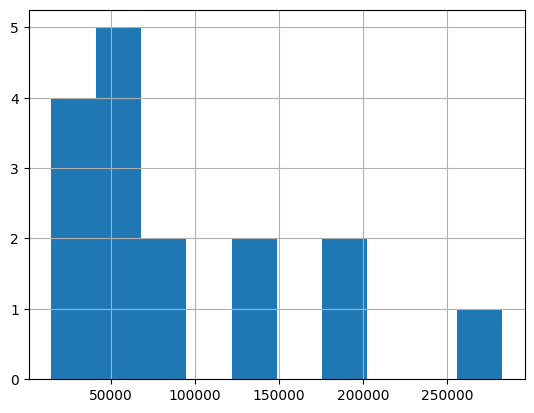

In [49]:
poordta_final['Pobre '].hist()

In [50]:
#first, subset to some interesting area, and then overlay that
gdpoor=agripyC0.query("Departamentos=='Alto Paraguay' | Departamentos=='Boqueron'")

<Axes: >

Text(0.5, 1.0, 'Poverty in Paraguay 2022')

[]

[]

Text(0.5, 80.7222222222222, 'Census Bureau - National Institute of Statistics')

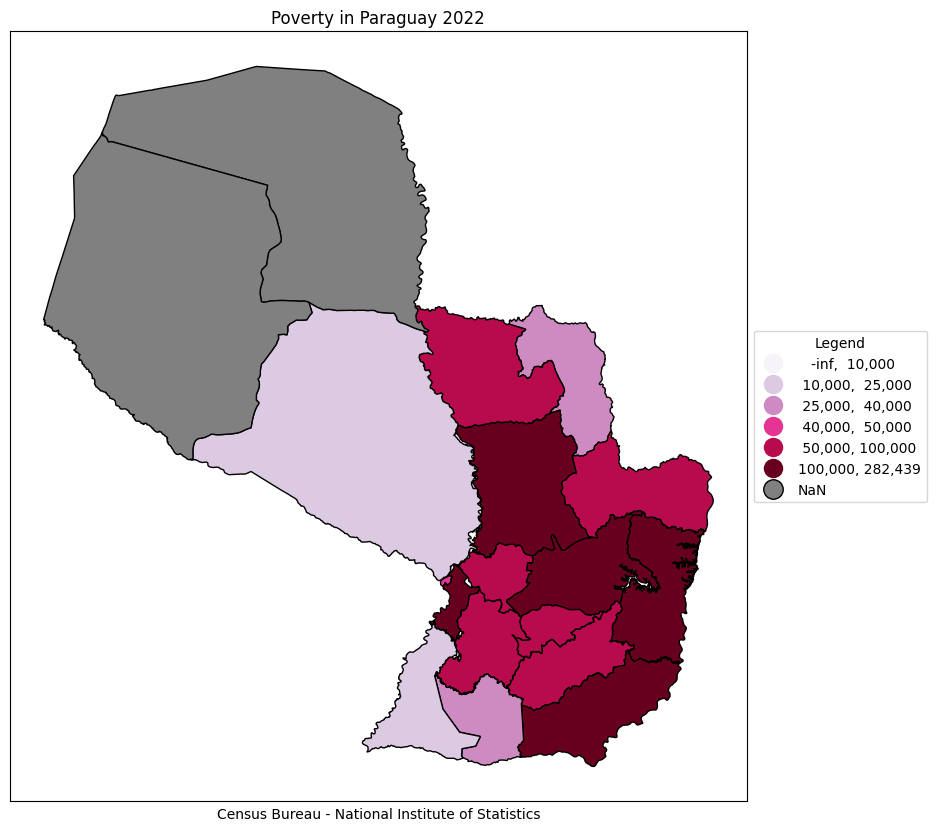

In [51]:
fig, ax = plt.subplots(1, figsize=(10,10))
poordta_final.plot(ax=ax, column='Pobre ', legend=True, cmap='PuRd',
              scheme='user_defined', classification_kwds={'bins': [10000, 25000, 40000, 50000, 100000]}, k=6, edgecolor='black', linewidth=1,
              legend_kwds={"fmt": "{:,.0f}", 'loc': 'center left', 'bbox_to_anchor': (1, 0.5), 'markerscale': 1.4},
              missing_kwds={'color': 'grey', 'edgecolor': 'black'})


leg1 = ax.get_legend()
leg1.set_title('''Legend''')  # Cambié el texto a "Legend"
ax.set_title("Poverty in Paraguay 2022")
ax.set_xticks([])  # Elimina las etiquetas en el eje x
ax.set_yticks([])  # Elimina las etiquetas en el eje y
ax.set_xlabel('''Census Bureau - National Institute of Statistics''')

# plt.savefig('fig.pdf', bbox_inches='tight')

In [52]:
print(poordta_final.columns)

Index(['UNCODEOR', 'CNTNAME3', 'COUNTRY_NA', 'CNTCODE_', 'Departamentos',
       'PCODE', 'COMMENTS_', 'geometry', 'Pobreza Extrema',
       'Pobreza no Extrema ', 'Pobre ', 'No Pobre'],
      dtype='object')


<Axes: >

KeyError: 'centroid'

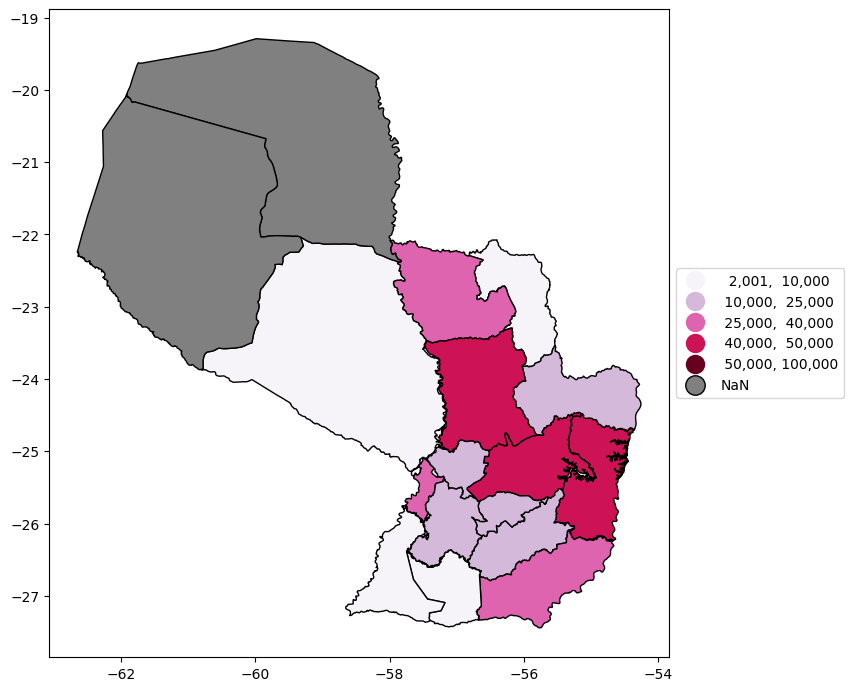

In [53]:
import matplotlib.pyplot as plt
from matplotlib.patheffects import withStroke

# Filtra valores nulos en geometría
agripyC0 = agripyC0[agripyC0.geometry.notnull()]

fig, ax = plt.subplots(1, figsize=(8, 10))
poordta_final.plot(ax=ax, column='Pobreza Extrema', legend=True, cmap='PuRd',
                   scheme='user_defined', classification_kwds={'bins': [10000, 25000, 40000, 50000, 100000]},
                   edgecolor='black', linewidth=1,
                   legend_kwds={
                       "fmt": "{:,.0f}",
                       'loc': 'center left',
                       'bbox_to_anchor': (1, 0.5),
                       'markerscale': 1.4
                   },
                   missing_kwds={'color': 'grey', 'edgecolor': 'black'})

# Añade etiquetas y flechas para departamentos pequeños con borde
for geom, x, y, label in zip(agripyC0.geometry, agripyC0['centroid'].x, agripyC0['centroid'].y, agripyC0['Departamentos']):
    if geom.area < 0.1:  # Ajusta el valor de 0.1 según el tamaño relativo de los departamentos
        # Etiqueta fuera con una flecha para departamentos pequeños
        offset = 0.05  # Ajusta el valor para definir la distancia del texto
        ax.annotate(label, xy=(x, y), xytext=(x + offset, y + offset),
                    fontsize=8, color='black',
                    arrowprops=dict(arrowstyle="->", color='black'),
                    path_effects=[withStroke(linewidth=2, foreground="white")],
                    horizontalalignment='center')
    else:
        # Etiqueta dentro para departamentos grandes
        ax.annotate(label, xy=(x, y), horizontalalignment='center',
                    fontsize=10, color='black',
                    path_effects=[withStroke(linewidth=2, foreground="white")])

# Configura el título y etiquetas
leg1 = ax.get_legend()
leg1.set_title("Legend")
ax.set_title("Poverty in Paraguay 2022")
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlabel("Census Bureau - National Institute of Statistics")

# plt.savefig('fig.pdf', bbox_inches='tight')
plt.show()

In [ ]:
%%capture
!pip install imgkit
!sudo apt-get install wkhtmltopdf
import imgkit

# **# Agriculture in Paraguay**
Paraguay is the world’s largest exporter of organic sugar, second-largest producer and exporter of stevia, third-largest soy exporter, and eighth-largest beef exporter.

Paraguay’s efforts to improve agricultural and livestock production present opportunities for basic inputs, such as animal genetics.  Farmers and ranchers are aware that using quality inputs is a key factor in their operations’ profitability and have been adopting advanced production practices, providing opportunities for fertilizers, pest control, and farm equipment.
Paraguay is the world’s second-largest producer of stevia after China.  Paraguay has the potential to be a global provider of stevia, creating opportunities to sell new and used processing machinery.  The most important market for stevia is currently the food and beverage industry, where buyers employ it as a sweetener and a flavoring agent.  Other important stevia markets include health and tea. (US INTERNATIONAL TRADING ADMINISTRATION, 2024)
https://www.trade.gov/country-commercial-guides/paraguay-agricultural-sectors


In [54]:
landpy=pd.read_excel('https://docs.google.com/uc?id=1EUgz0cF_9YY3OLF2BR4InwbqZ1N3LM5L&export=download')

In [55]:
landpy.head(25)

,Departamentos,year2022
0,Concepcion,1.521325e+06
1,San Pedro,1.845159e+06
2,Cordillera,4.144014e+05
3,Guaira,3.356557e+05
4,Caaguazu,1.197215e+06
5,Caazapa,8.454182e+05
6,Itapua,1.400126e+06
7,Misiones,6.743982e+05
8,Paraguari,6.925966e+05
9,Alto Parana,1.263189e+06


In [56]:
land2022=landpy[['Departamentos','year2022']]

In [57]:
land2022.dtypes

,0
Departamentos,object
year2022,float64


In [58]:
#merge part 1 (se combinan los datos del shapefile y el data y todos tienen que decir both (deseable))
land2022= pd.merge(land2022, agripyC0, on='Departamentos',how='outer',indicator=True) #(make sure to have njC shapefile from previous sec)
land2022[['Departamentos','year2022','_merge']] #all good, NEW JERSEY expected not to merge

,Departamentos,year2022,_merge
0,Alto Paraguay,4.872899e+06,both
1,Alto Parana,1.263189e+06,both
2,Amambay,1.092512e+06,both
3,Asuncion,NaN,right_only
4,Boqueron,5.870130e+06,both
5,Caaguazu,1.197215e+06,both
6,Caazapa,8.454182e+05,both
7,Canindeyu,1.165868e+06,both
8,Censo Agronomico Nacional,NaN,left_only
9,Central,8.194157e+04,both


In [59]:
#merge part 2
land2022_final = pd.merge(land2022, agripyC0, on='Departamentos',how='inner',indicator=False) #Este codigo es para combinar solo aquellos que dicen both

In [60]:
type(land2022_final)

pandas.core.frame.DataFrame

In [61]:
land2022_final=gpd.GeoDataFrame(land2022_final, geometry='geometry_x')

<Axes: >

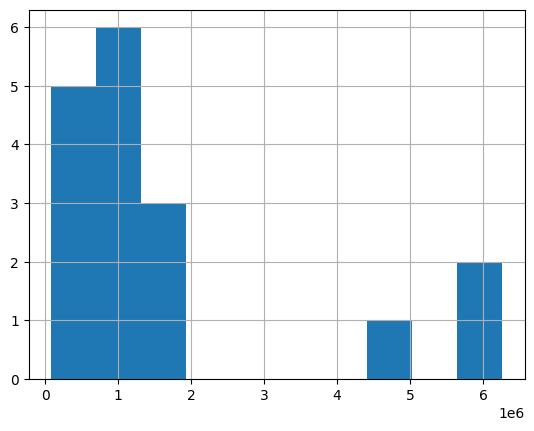

In [62]:
land2022_final['year2022'].hist()

<Axes: >

Text(0.5, 1.0, "Paraguay's 2022 Agricultural Land (ha)")

[]

[]

Text(0.5, 210.29872565733612, 'CAN- NATIONAL AGRONOMIC CENSUS')

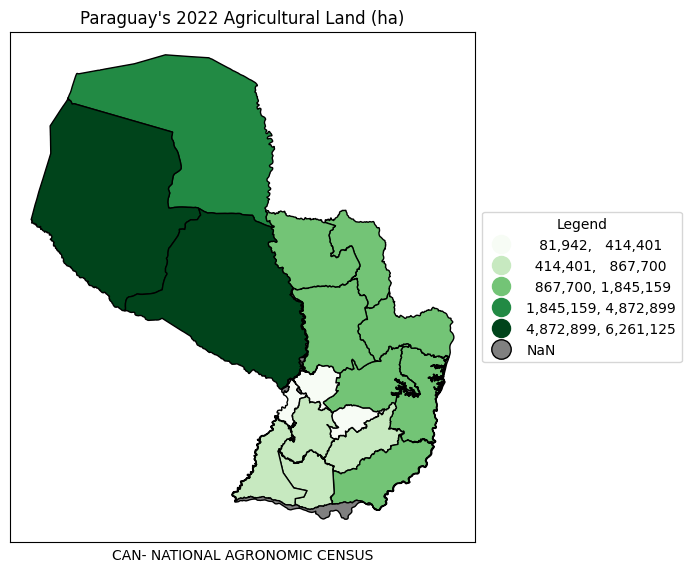

In [63]:
fig, ax = plt.subplots(1, figsize=(6,10))
land2022_final.plot(ax=ax, column='year2022', legend=True, cmap='Greens',
              scheme='natural_breaks', k=5, edgecolor='black', linewidth=1,
              legend_kwds={"fmt": "{:,.0f}", 'loc': 'center left', 'bbox_to_anchor': (1, 0.5), 'markerscale': 1.4},
              missing_kwds={'color': 'grey', 'edgecolor': 'black'})

leg1 = ax.get_legend()
leg1.set_title('''Legend''')  # Cambié el texto a "Legend"
ax.set_title("Paraguay's 2022 Agricultural Land (ha)")
ax.set_xticks([])  # Elimina las etiquetas en el eje x
ax.set_yticks([])  # Elimina las etiquetas en el eje y
ax.set_xlabel('''CAN- NATIONAL AGRONOMIC CENSUS''')

# plt.savefig('fig.pdf', bbox_inches='tight')

<ipython-input-64-511352237b1f>:4: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  agripyC0['centroid'] = agripyC0.geometry.centroid


<Axes: >

Text(-59.41002564020435, -20.589775106924037, 'Alto Paraguay')

Text(-54.96344820654604, -25.395010354542094, 'Alto Parana')

Text(-56.059772864642426, -22.883499473953474, 'Amambay')

Text(-57.55120273880594, -25.232519275728773, 'Asuncion')

Text(-61.05800990815893, -21.90412229561398, 'Boqueron')

Text(-55.88829251822675, -25.18617423083693, 'Caaguazu')

Text(-56.05890687659377, -26.234855944824425, 'Caazapa')

Text(-55.21454424019448, -24.231487705503397, 'Canindeyu')

Text(-57.497947339254054, -25.54423328787446, 'Central')

Text(-57.11931334517439, -22.838760815277286, 'Concepcion')

Text(-56.94167022305784, -25.194067379616826, 'Cordillera')

Text(-56.295397662675235, -25.822987895702347, 'Guaira')

Text(-55.70865624673644, -26.78721100989233, 'Itapua')

Text(-56.64695466967042, -26.57742202313012, 'Lagos, Islas, Rios')

Text(-57.103408931281535, -26.895587634753422, 'Misiones')

Text(-57.892330769003095, -26.727551637255974, 'Neembucu')

Text(-57.127675327789746, -26.039153064708902, 'Paraguari')

Text(-58.68470974246988, -23.611652913512483, 'Presidente Hayes')

Text(-56.63383765013266, -24.16259720021804, 'San Pedro')

Text(0.5, 1.0, "Paraguay's 2022 Agricultural Land (ha)")

[]

[]

Text(0.5, 125.15756013570739, 'CAN - NATIONAL AGRONOMIC CENSUS')

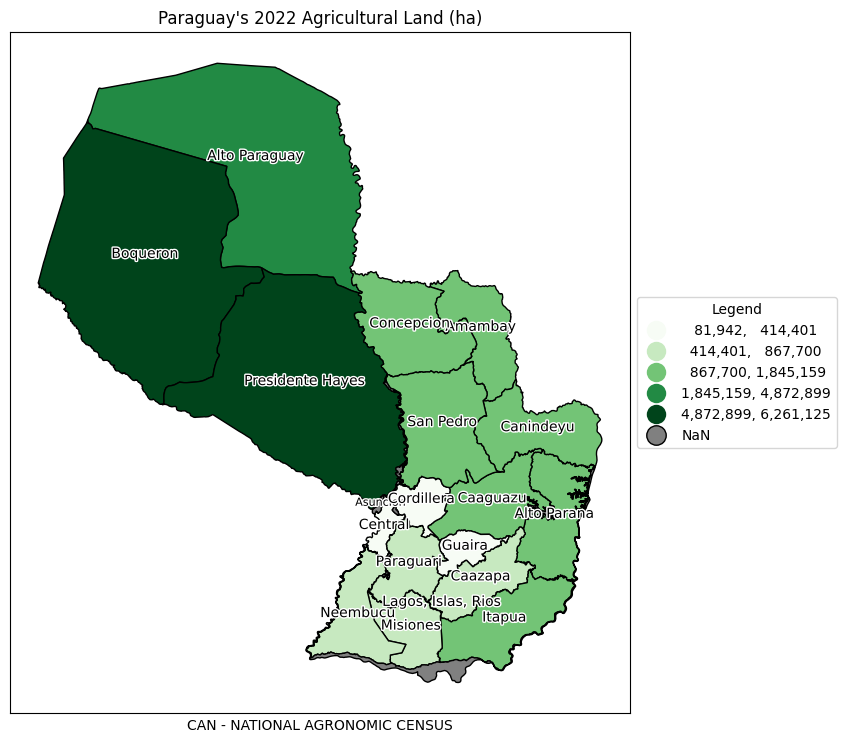

In [64]:
from matplotlib.patheffects import withStroke

# Calcula los centroides de los polígonos para ubicar las etiquetas
agripyC0['centroid'] = agripyC0.geometry.centroid

fig, ax = plt.subplots(1, figsize=(8, 10))
land2022_final.plot(ax=ax, column='year2022', legend=True, cmap='Greens',
                    scheme='natural_breaks', k=5, edgecolor='black', linewidth=1,
                    legend_kwds={"fmt": "{:,.0f}", 'loc': 'center left', 'bbox_to_anchor': (1, 0.5), 'markerscale': 1.4},
                    missing_kwds={'color': 'grey', 'edgecolor': 'black'})

# Añade etiquetas y flechas para departamentos pequeños con borde
for geom, x, y, label in zip(agripyC0.geometry, agripyC0['centroid'].x, agripyC0['centroid'].y, agripyC0['Departamentos']):
    if geom.area < 0.1:  # Ajusta el valor de 0.1 según el tamaño relativo de los departamentos
        # Etiqueta fuera con una flecha para departamentos pequeños
        offset = 0.05  # Ajusta el valor para definir la distancia del texto
        ax.annotate(label, xy=(x, y), xytext=(x + offset, y + offset),
                    fontsize=8, color='black',
                    arrowprops=dict(arrowstyle="->", color='black'),
                    path_effects=[withStroke(linewidth=2, foreground="white")],  # Borde más grueso
                    horizontalalignment='center')
    else:
        # Etiqueta dentro para departamentos grandes
        ax.annotate(label, xy=(x, y), horizontalalignment='center',
                    fontsize=10, color='black',
                    path_effects=[withStroke(linewidth=2, foreground="white")])  # Borde más grueso

leg1 = ax.get_legend()
leg1.set_title("Legend")
ax.set_title("Paraguay's 2022 Agricultural Land (ha)")
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlabel("CAN - NATIONAL AGRONOMIC CENSUS")

# plt.savefig('fig.pdf', bbox_inches='tight')

Acording to the National Agronomic Census in 2022, Of the 291,497 agricultural farms, 283,052 are located in the Eastern Region, which represents 97% of the total number of farms, and 8,445 are located in the Western Region, which represents 3%. Regarding the surface area of ​​agricultural farms, there is a total of 30,401,660 ha. The Eastern Region concentrates 44% of the surface area (13,397,506 ha) and the Western Region 56% (17,004,154 ha). (FOOD AND AGRICULTURE ORGANIZATION, 2023)
https://www.fao.org/paraguay/noticias/detail-events/en/c/1644249/#:~:text=Con%20relaci%C3%B3n%20a%20la%20superficie,(17.004.154%20ha).

Departamentos en pop2: ['ALTO PARAGUAY' 'ALTO PARANA' 'AMAMBAY' 'ASUNCION' 'BOQUERON' 'CAAGUAZU'
 'CAAZAPA' 'CANINDEYU' 'CENTRAL' 'CONCEPCION' 'CORDILLERA' 'GUAIRA'
 'ITAPUA' 'MISIONES' 'NEEMBUCU' 'PARAGUARI' 'PRESIDENTE HAYES' 'SAN PEDRO']
Departamentos en poordta_final: ['ALTO PARAGUAY' 'ALTO PARANA' 'AMAMBAY' 'ASUNCION' 'BOQUERON' 'CAAGUAZU'
 'CAAZAPA' 'CANINDEYU' 'CENTRAL' 'CONCEPCION' 'CORDILLERA' 'GUAIRA'
 'ITAPUA' 'MISIONES' 'NEEMBUCU' 'PARAGUARI' 'PRESIDENTE HAYES' 'SAN PEDRO']


<Axes: >

Text(0.5, 1.0, "Paraguay's Population")

[]

[]

(-82517.96363164042, 778140.4391415551)

(6963811.950587815, 7864234.3299847115)

<Axes: >

Text(0.5, 1.0, 'Poverty in Paraguay')

[]

[]

(-82517.96363164042, 778140.4391415551)

(6963811.950587815, 7864234.3299847115)

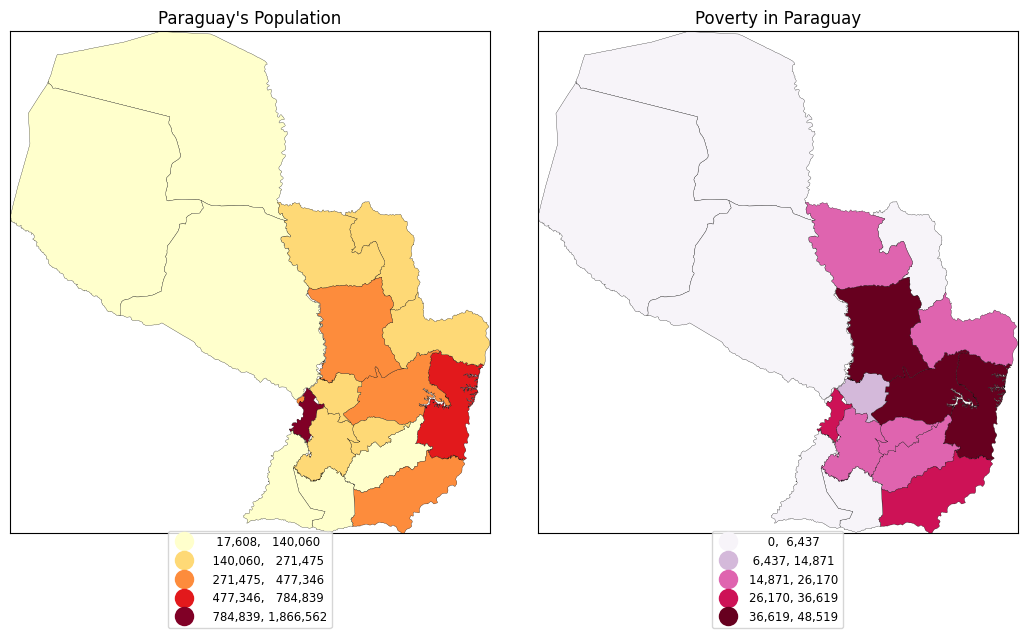

In [65]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Asegúrate de que los nombres de los departamentos sean consistentes
pop2['Departamentos'] = pop2['Departamentos'].str.strip().str.upper()
poordta_final['Departamentos'] = poordta_final['Departamentos'].str.strip().str.upper()

# Verifica si los departamentos clave están presentes
print("Departamentos en pop2:", pop2['Departamentos'].unique())
print("Departamentos en poordta_final:", poordta_final['Departamentos'].unique())

# Llena valores faltantes para asegurar que se representen en el mapa
pop2['Poblacion'] = pop2['Poblacion'].fillna(0)
poordta_final['Pobreza Extrema'] = poordta_final['Pobreza Extrema'].fillna(0)

# Asegúrate de que los datos estén en un CRS proyectado
pop2 = pop2.to_crs(epsg=32721)
poordta_final = poordta_final.to_crs(epsg=32721)

# Define los límites generales de la extensión
minx, miny, maxx, maxy = min(pop2.total_bounds[0], poordta_final.total_bounds[0]), \
                         min(pop2.total_bounds[1], poordta_final.total_bounds[1]), \
                         max(pop2.total_bounds[2], poordta_final.total_bounds[2]), \
                         max(pop2.total_bounds[3], poordta_final.total_bounds[3])

# Crea la figura con un tamaño adecuado
fig, axs = plt.subplots(1, 2, figsize=(13, 12), sharey=True)

# Mapa 1 - Población en Paraguay
pop2.plot(ax=axs[0], column='Poblacion', legend=True, cmap='YlOrRd',
          scheme='natural_breaks', k=5, edgecolor='black', linewidth=0.2,
          legend_kwds={
              "fmt": "{:,.0f}",
              'loc': 'lower center',
              'bbox_to_anchor': (0.5, -0.2),
              'title_fontsize': 'medium',
              'fontsize': 'small',
              'markerscale': 1.4
          })
axs[0].set_title("Paraguay's Population")
axs[0].set_xticks([])
axs[0].set_yticks([])
axs[0].set_xlim(minx, maxx)
axs[0].set_ylim(miny, maxy)

# Mapa 2 - Pobreza en Paraguay
poordta_final.plot(ax=axs[1], column='Pobreza Extrema', legend=True, cmap='PuRd',
                   scheme='natural_breaks', k=5, edgecolor='black', linewidth=0.2,
                   legend_kwds={
                       "fmt": "{:,.0f}",
                       'loc': 'lower center',
                       'bbox_to_anchor': (0.5, -0.2),
                       'title_fontsize': 'medium',
                       'fontsize': 'small',
                       'markerscale': 1.4
                   })
axs[1].set_title("Poverty in Paraguay")
axs[1].set_xticks([])
axs[1].set_yticks([])
axs[1].set_xlim(minx, maxx)
axs[1].set_ylim(miny, maxy)

plt.subplots_adjust(wspace=0.1)
plt.show()


Departamentos en land2022_final: ['ALTO PARAGUAY' 'ALTO PARANA' 'AMAMBAY' 'ASUNCION' 'BOQUERON' 'CAAGUAZU'
 'CAAZAPA' 'CANINDEYU' 'CENTRAL' 'CONCEPCION' 'CORDILLERA' 'GUAIRA'
 'ITAPUA' 'LAGOS, ISLAS, RIOS' 'MISIONES' 'NEEMBUCU' 'PARAGUARI'
 'PRESIDENTE HAYES' 'SAN PEDRO']
Departamentos en poordta_final: ['ALTO PARAGUAY' 'ALTO PARANA' 'AMAMBAY' 'ASUNCION' 'BOQUERON' 'CAAGUAZU'
 'CAAZAPA' 'CANINDEYU' 'CENTRAL' 'CONCEPCION' 'CORDILLERA' 'GUAIRA'
 'ITAPUA' 'MISIONES' 'NEEMBUCU' 'PARAGUARI' 'PRESIDENTE HAYES' 'SAN PEDRO']


<Axes: >

Text(0.5, 1.0, "Paraguay's Agriculural Land 2022")

[]

[]

(-82517.96363164042, 778140.4391415551)

(6963811.950587815, 7864234.3299847115)

<Axes: >

Text(0.5, 1.0, 'Poverty in Paraguay')

[]

[]

(-82517.96363164042, 778140.4391415551)

(6963811.950587815, 7864234.3299847115)

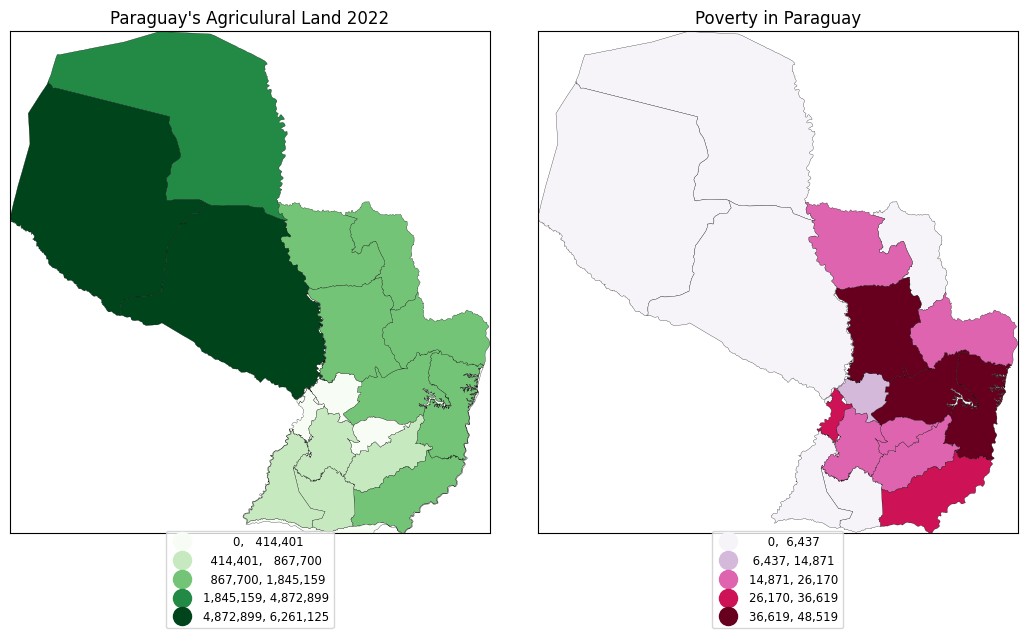

In [70]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Asegúrate de que los nombres de los departamentos sean consistentes
land2022_final['Departamentos'] = land2022_final['Departamentos'].str.strip().str.upper()
poordta_final['Departamentos'] = poordta_final['Departamentos'].str.strip().str.upper()

# Verifica si los departamentos clave están presentes
print("Departamentos en land2022_final:", land2022_final['Departamentos'].unique())
print("Departamentos en poordta_final:", poordta_final['Departamentos'].unique())

# Llena valores faltantes para asegurar que se representen en el mapa
land2022_final['year2022'] = land2022_final['year2022'].fillna(0)
poordta_final['Pobreza Extrema'] = poordta_final['Pobreza Extrema'].fillna(0)

# Asegúrate de que los datos estén en un CRS proyectado
land2022_final = land2022_final.to_crs(epsg=32721)
poordta_final = poordta_final.to_crs(epsg=32721)

# Define los límites generales de la extensión
minx, miny, maxx, maxy = min(pop2.total_bounds[0], poordta_final.total_bounds[0]), \
                         min(pop2.total_bounds[1], poordta_final.total_bounds[1]), \
                         max(pop2.total_bounds[2], poordta_final.total_bounds[2]), \
                         max(pop2.total_bounds[3], poordta_final.total_bounds[3])

# Crea la figura con un tamaño adecuado
fig, axs = plt.subplots(1, 2, figsize=(13, 12), sharey=True)

# Mapa 1 - Zonas Agrícolas
land2022_final.plot(ax=axs[0], column='year2022', legend=True, cmap='',
          scheme='natural_breaks', k=5, edgecolor='black', linewidth=0.2,
          legend_kwds={
              "fmt": "{:,.0f}",
              'loc': 'lower center',
              'bbox_to_anchor': (0.5, -0.2),
              'title_fontsize': 'medium',
              'fontsize': 'small',
              'markerscale': 1.4
          })
axs[0].set_title("Paraguay's Agriculural Land 2022")
axs[0].set_xticks([])
axs[0].set_yticks([])
axs[0].set_xlim(minx, maxx)
axs[0].set_ylim(miny, maxy)

# Mapa 2 - Pobreza en Paraguay
poordta_final.plot(ax=axs[1], column='Pobreza Extrema', legend=True, cmap='PuRd',
                   scheme='natural_breaks', k=5, edgecolor='black', linewidth=0.2,
                   legend_kwds={
                       "fmt": "{:,.0f}",
                       'loc': 'lower center',
                       'bbox_to_anchor': (0.5, -0.2),
                       'title_fontsize': 'medium',
                       'fontsize': 'small',
                       'markerscale': 1.4
                   })
axs[1].set_title("Poverty in Paraguay")
axs[1].set_xticks([])
axs[1].set_yticks([])
axs[1].set_xlim(minx, maxx)
axs[1].set_ylim(miny, maxy)

plt.subplots_adjust(wspace=0.1)
plt.show()

In [91]:
import seaborn as sns
import plotly.express as px #a quick simple one
import plotly.graph_objects as go #can get convoluted
import numpy as np
import pandas as pd

In [92]:
# Asegúrate de que los datos tienen las columnas requeridas
# Por ejemplo, 'Departamentos', 'Pobreza Extrema' y 'Poblacion'

# Datos simulados para demostración (ajusta esto con los nombres de columnas reales en poordta_final)
df = pop2.copy()
df['country'] = "Paraguay"  # Agrega un nivel superior si no existe

# Crea el mapa temático
fig = px.treemap(df,
                 path=[px.Constant("Paraguay"), 'Departamentos'],  # Ajusta 'Departamentos' según tus datos
                 values='Poblacion',  # Ajusta 'Poblacion' o el campo que desees usar
                 color='Poblacion',  # Ajusta el campo del color
                 hover_data=['Poblacion'],  # Ajusta los datos para hover
                 color_continuous_scale='inferno',
                 color_continuous_midpoint=np.average(df['Total de Viviendas'], weights=df['Poblacion']))  # Ajusta los pesos si es necesario

# Muestra la visualización
fig.show()

In [93]:
# Asegúrate de que los datos tienen las columnas requeridas
# Por ejemplo, 'Departamentos', 'Pobreza Extrema' y 'Poblacion'

# Datos simulados para demostración (ajusta esto con los nombres de columnas reales en poordta_final)
df = poverty.copy()
df['country'] = "Paraguay"  # Agrega un nivel superior si no existe

# Crea el mapa temático
fig = px.treemap(df,
                 path=[px.Constant("Paraguay"), 'Departamentos'],  # Ajusta 'Departamentos' según tus datos
                 values='Pobre ',  # Ajusta 'Poblacion' o el campo que desees usar
                 color='Pobreza Extrema',  # Ajusta el campo del color
                 hover_data=['Pobreza Extrema'],  # Ajusta los datos para hover
                 color_continuous_scale='RdBu',
                 color_continuous_midpoint=np.average(df['Pobreza Extrema'], weights=df['Pobre ']))  # Ajusta los pesos si es necesario

# Muestra la visualización
fig.show()